<a href="https://colab.research.google.com/github/KirZa-alt/Parental-Education-prediction/blob/main/Parental_Education_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement: Predicting Parental Level of Education**

**Objective:**

To predict the parental level of education of a student using their personal and academic features such as gender, race/ethnicity, lunch type, test preparation course, and exam scores (math, reading, writing).

**Dataset:**

The dataset contains the following columns:

- gender

- race/ethnicity

- parental level of education (target variable)

- lunch

- test preparation course

- math score

- reading score

- writing score

**Goal:**

Build a machine learning model to predict parental education level.

Evaluate the model’s performance using accuracy and other classification metrics.

Understand whether student-related features have a significant impact on predicting parental education.

**Expected Insight:**

If the model performs poorly (low accuracy), it indicates that student scores and demographics alone are insufficient to predict parental education reliably.

This helps in identifying feature limitations and guides future data collection for better predictive modeling.**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.DataFrame((pd.read_csv("/content/StudentsPerformance.csv")))

print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
# Data Understanding
print(df.info)
print("\n",df.describe())
print("\n",df.shape)

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

In [6]:
# data cleaning

print("null values:\n",df.isnull().sum())
print("dublicated values: ",df.duplicated().sum())

null values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
dublicated values:  0


In [7]:
# outliers checking

print(df.columns)


class Outliers:
    def __init__(self, df, column):
        self.df = df
        self.column = column

    def find_outliers(self):
        data = self.df[self.column]

        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        outliers = data[(data < lower_limit) | (data > upper_limit)]

        print(f"Column: {self.column}")

        print("Outliers are:\n", outliers)

for col in ["math score", "writing score", "reading score"]:
    obj = Outliers(df, col)
    obj.find_outliers()
    print("------")

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
Column: math score
Outliers are:
 17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math score, dtype: int64
------
Column: writing score
Outliers are:
 59     10
76     22
327    19
596    15
980    23
Name: writing score, dtype: int64
------
Column: reading score
Outliers are:
 59     17
76     26
211    28
327    23
596    24
980    24
Name: reading score, dtype: int64
------


In [8]:
cols = ["math score", "reading score", "writing score"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

print("✅ Outliers replaced with median successfully!")

df.shape
df[["math score","writing score","reading score"]]==0

✅ Outliers replaced with median successfully!


,math score,writing score,reading score
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [32]:
df.head()
print(df["parental level of education"].unique())

from sklearn.preprocessing import OneHotEncoder ,LabelEncoder, OrdinalEncoder

le=LabelEncoder()

df["gender"]=le.fit_transform(df["gender"])
df["race/ethnicity"]=le.fit_transform(df["race/ethnicity"])
df["test preparation course"]=le.fit_transform(df["test preparation course"])

oe = OrdinalEncoder()
df['parental level of education'] = oe.fit_transform(df[['parental level of education']])

print(df.head())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
   gender  race/ethnicity  parental level of education  \
0       0               1                          1.0   
1       0               2                          4.0   
2       0               1                          3.0   
3       1               0                          0.0   
4       1               2                          4.0   

   test preparation course  math score  reading score  writing score  
0                        1        72.0           72.0           74.0  
1                        0        69.0           90.0           88.0  
2                        1        90.0           95.0           93.0  
3                        1        47.0           57.0           44.0  
4                        1        76.0           78.0           75.0  


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X=df.drop(columns=["parental level of education"])
y=df["parental level of education"]

X_train, X_test, y_train, y_test=train_test_split(X,y ,test_size=0.2 ,random_state=42)

model=LogisticRegression()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic regression Accuracy:", accuracy)

classification = classification_report(y_test, y_pred)
print("classification_report:", classification)

# KNN
model= KNeighborsClassifier()

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# random forest

model=RandomForestClassifier()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random forest Accuracy:", accuracy)

# Decision tree

model= DecisionTreeClassifier()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Decision tree Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression Accuracy: 0.17
classification_report:               precision    recall  f1-score   support

         0.0       0.14      0.28      0.19        43
         1.0       0.22      0.09      0.13        22
         2.0       0.25      0.24      0.25        37
         3.0       0.00      0.00      0.00        12
         4.0       0.17      0.25      0.20        44
         5.0       0.00      0.00      0.00        42

    accuracy                           0.17       200
   macro avg       0.13      0.14      0.13       200
weighted avg       0.14      0.17      0.14       200

KNN Accuracy: 0.255
Random forest Accuracy: 0.215
Decision tree Accuracy: 0.235


**Accuracy Result**

The accuracy is maximum 25% and minimin 17% so its means Other Columns does not strongly effected On education column.

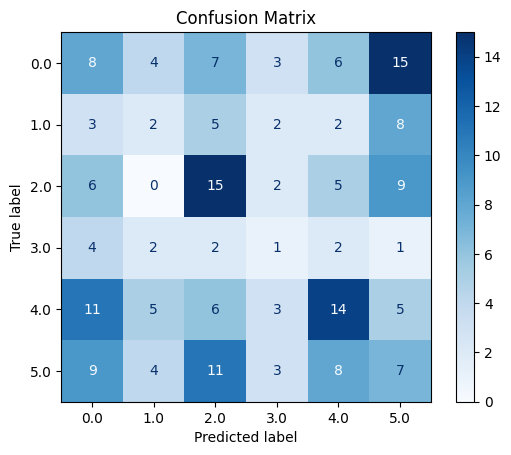

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [58]:
import joblib

# Save the model
joblib.dump(model, "education_model.pkl")

# Load it again (when needed)
loaded_model = joblib.load("education_model.pkl")
